In [72]:
import os
import sys
import json
import torch
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from torchsummary import summary
import matplotlib.pyplot as plt
from model_dev.dataloader import data_provider
from model_dev.stock_picker import StockPicker
from visualize_single import Visualize, craete_heatmap
from scatter_plot import Scatter
from model_dev.utills import read_default_args, load_model, get_stock_meta, get_stock_heatmap_matrix

# import mse loss from torch
from torch.nn import MSELoss
# import lregularized mse loss from torch


%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/Users/shiva/Desktop/maestro/model_dev/')
from expirement import ExpMain


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DLinear

In [73]:
default_args = read_default_args()

In [74]:
config_file = '../../configs/config_shiva.json'
config = json.load(open(config_file))
data_dir = config['data_dir']
raw_dir = "{}/{}".format(data_dir, config['raw_data_dir'])
csv_dir = "{}/{}".format(data_dir, config['raw_data_csv'])
ltsf = "{}/ltsf".format(data_dir)

In [75]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 1,
   'learning_rate': 0.025,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 3,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value

args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)

weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
sorted_weights

['checkpoint_1.4682.pth',
 'checkpoint_0.2044.pth',
 'checkpoint_0.0161.pth',
 'checkpoint_0.0109.pth',
 'checkpoint_0.0095.pth']

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl120_pl30_ds_03_23_tg_3_ch_397/checkpoint_0.0095.pth
Original data shape: (14250, 398)
Data shape after inter-day:  8550
train 5836


  0%|          | 0/167 [00:00<?, ?it/s]

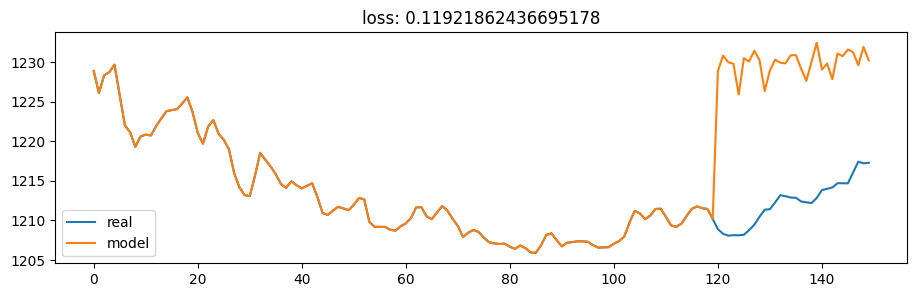

  1%|          | 1/167 [00:00<00:22,  7.35it/s]

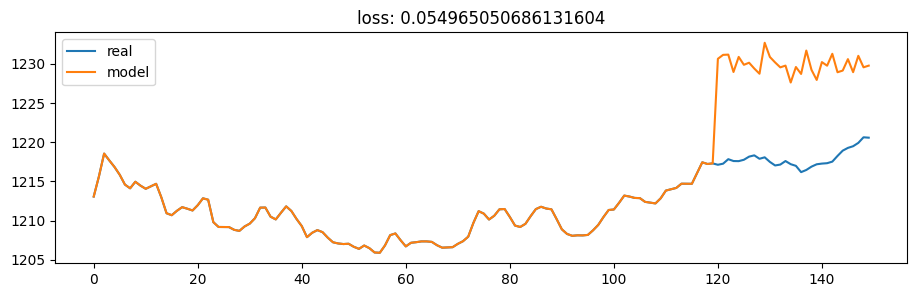

  1%|          | 2/167 [00:00<00:21,  7.51it/s]

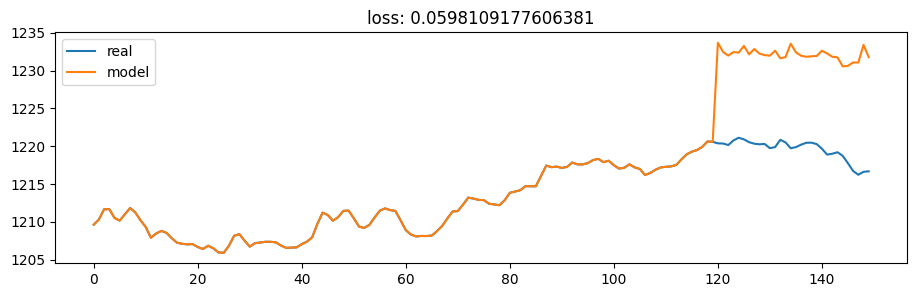

  2%|▏         | 3/167 [00:00<00:22,  7.33it/s]

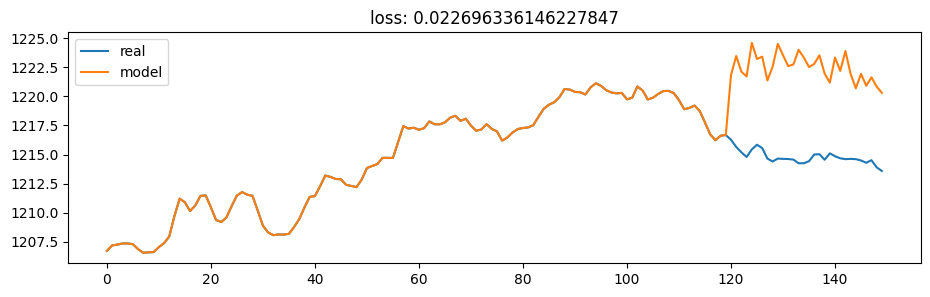

  2%|▏         | 4/167 [00:00<00:22,  7.29it/s]

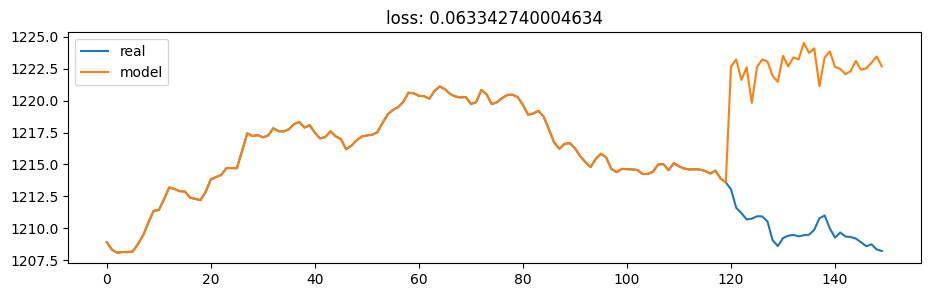

  3%|▎         | 5/167 [00:00<00:23,  6.84it/s]

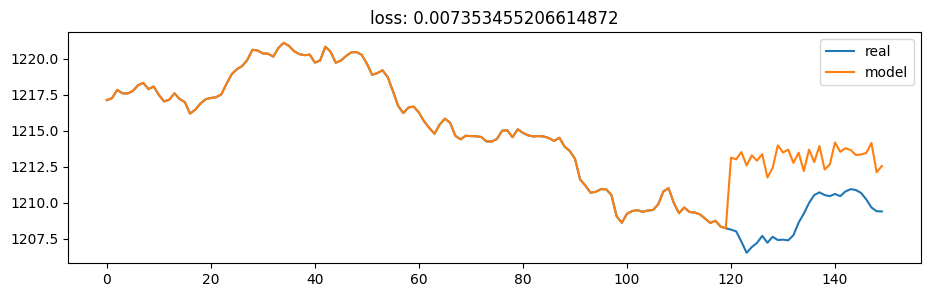

  4%|▎         | 6/167 [00:00<00:26,  6.10it/s]

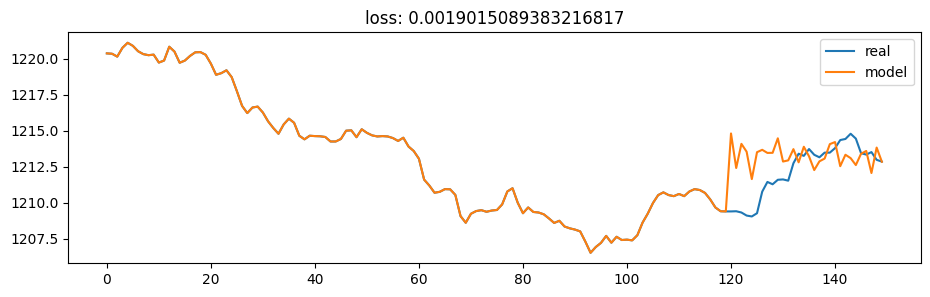

  4%|▍         | 7/167 [00:01<00:28,  5.56it/s]

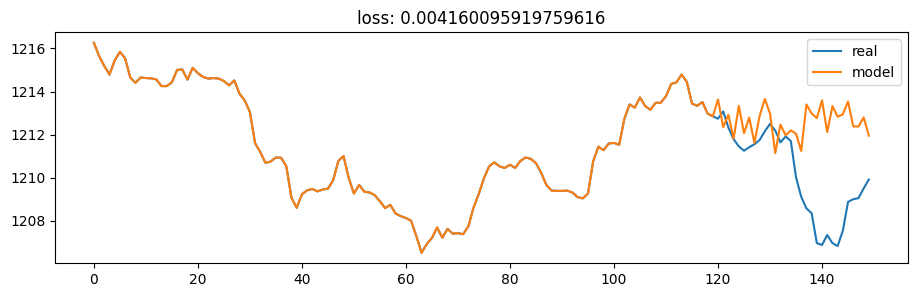

  5%|▍         | 8/167 [00:01<00:28,  5.61it/s]

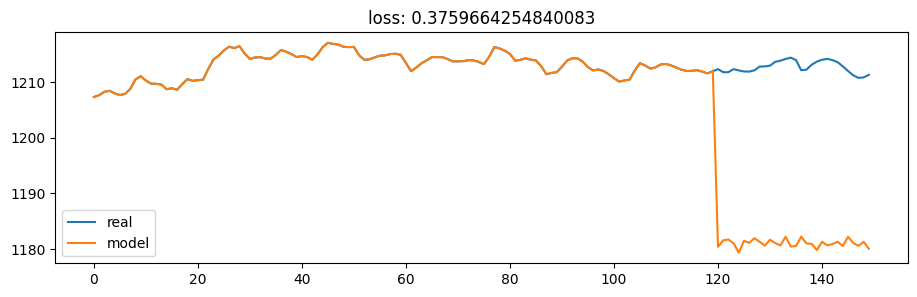

  5%|▌         | 9/167 [00:01<00:27,  5.84it/s]

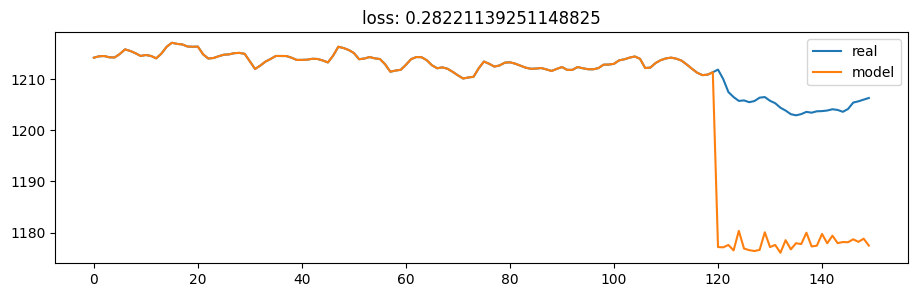

  6%|▌         | 10/167 [00:01<00:25,  6.16it/s]

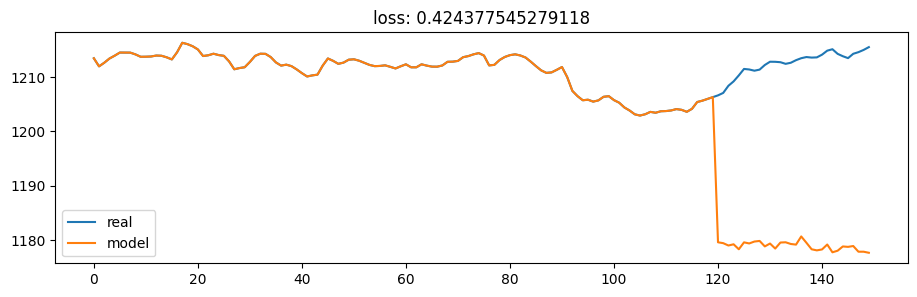

  7%|▋         | 11/167 [00:01<00:24,  6.27it/s]

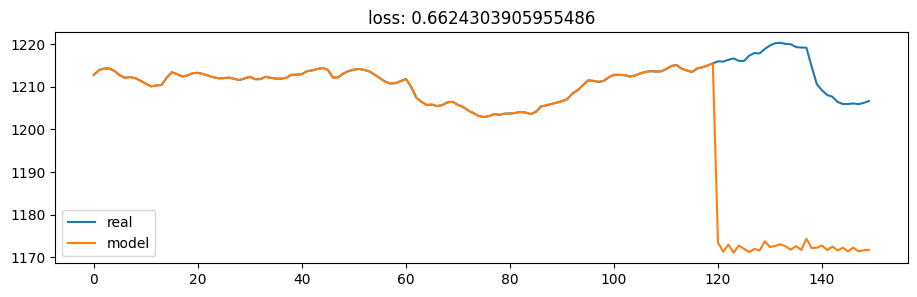

  7%|▋         | 12/167 [00:01<00:28,  5.43it/s]

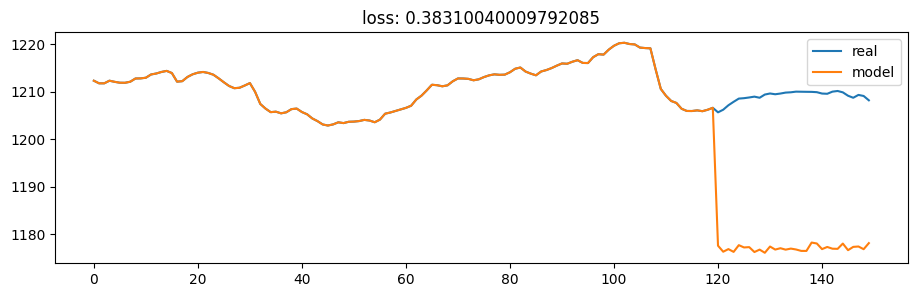

  8%|▊         | 13/167 [00:02<00:33,  4.66it/s]

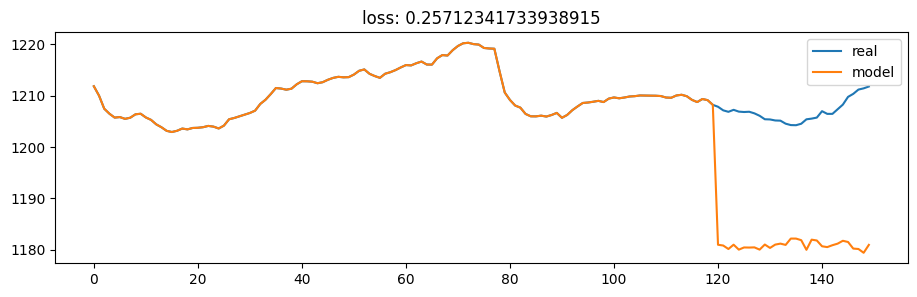

  8%|▊         | 14/167 [00:02<00:30,  5.02it/s]

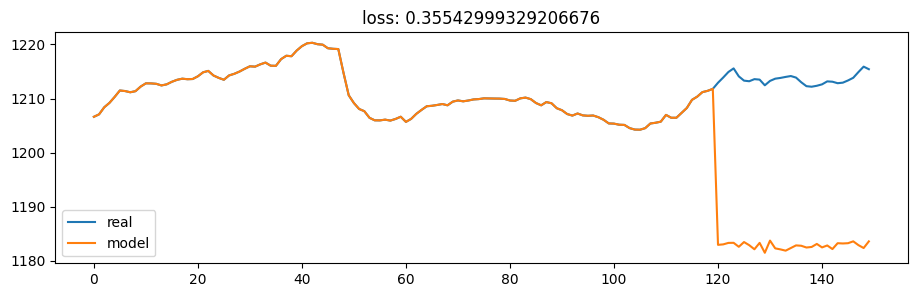

  9%|▉         | 15/167 [00:02<00:28,  5.41it/s]

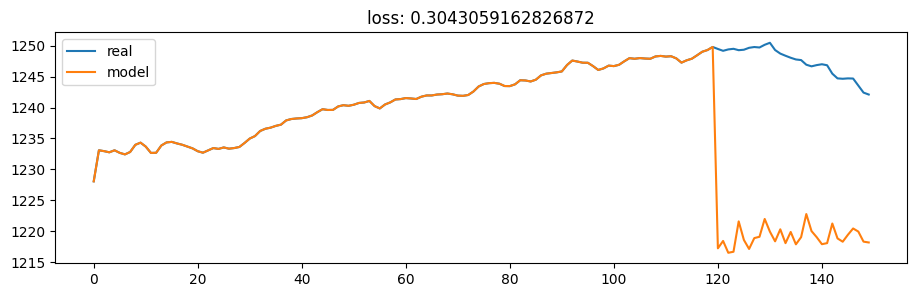

 10%|▉         | 16/167 [00:02<00:29,  5.14it/s]

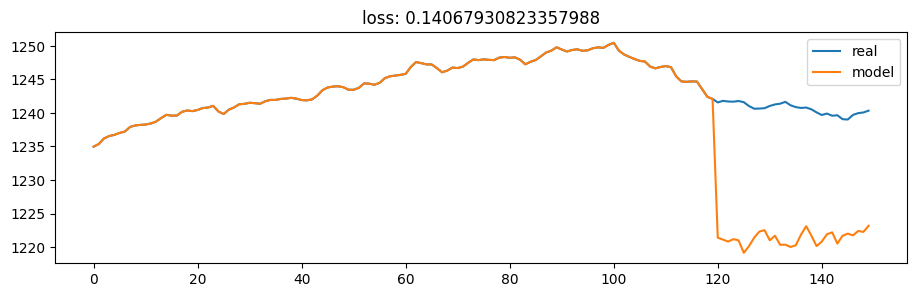

 10%|█         | 17/167 [00:02<00:28,  5.23it/s]

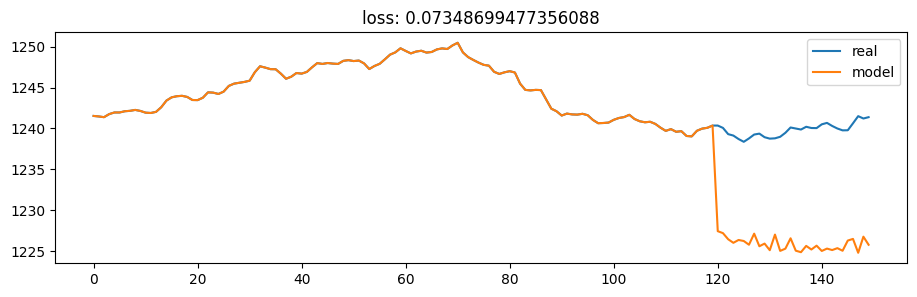

 11%|█         | 18/167 [00:03<00:30,  4.81it/s]

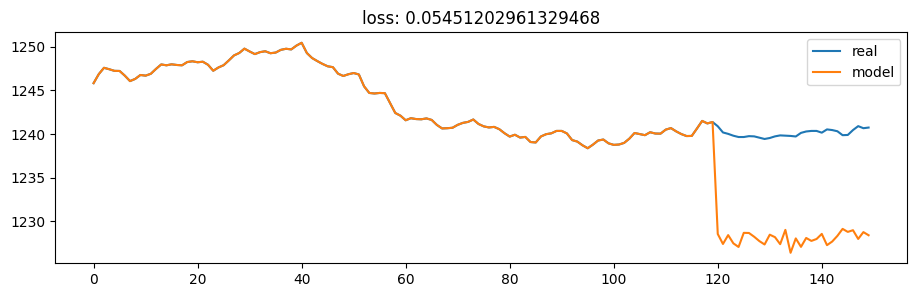

 11%|█▏        | 19/167 [00:03<00:30,  4.91it/s]

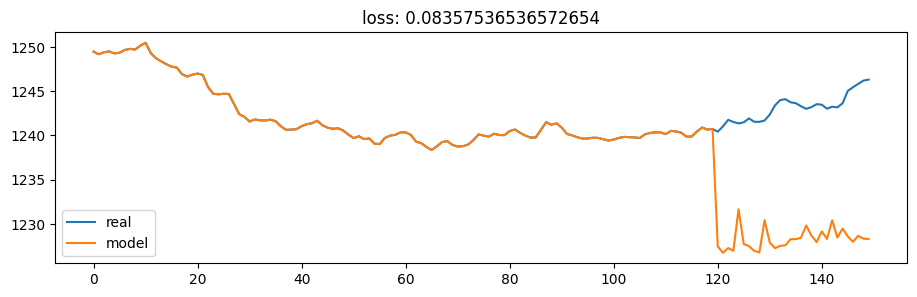

 12%|█▏        | 20/167 [00:03<00:27,  5.33it/s]

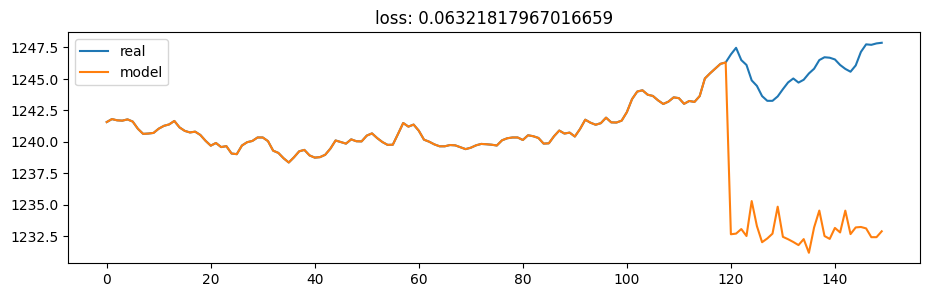

 13%|█▎        | 21/167 [00:03<00:26,  5.41it/s]

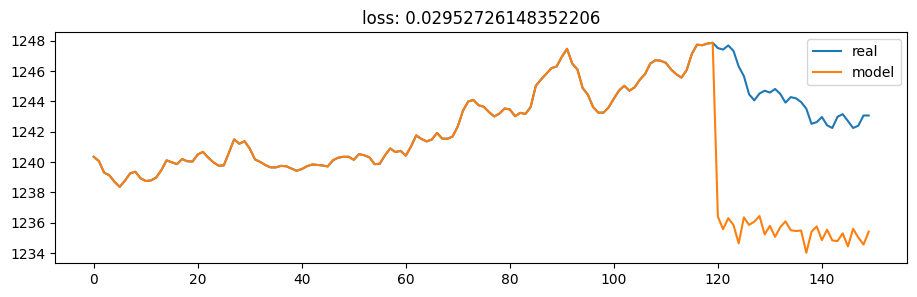

 13%|█▎        | 22/167 [00:03<00:26,  5.54it/s]

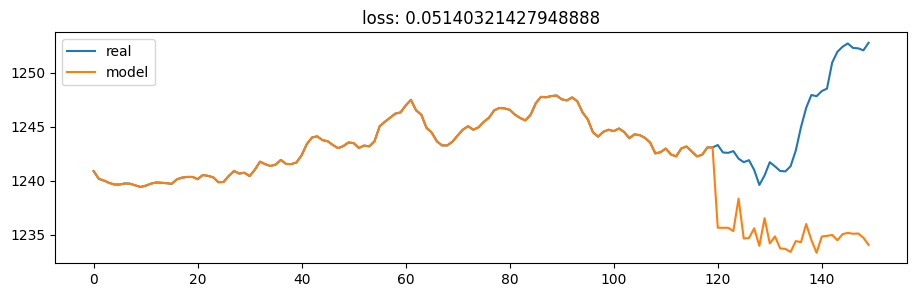

 14%|█▍        | 23/167 [00:04<00:26,  5.51it/s]

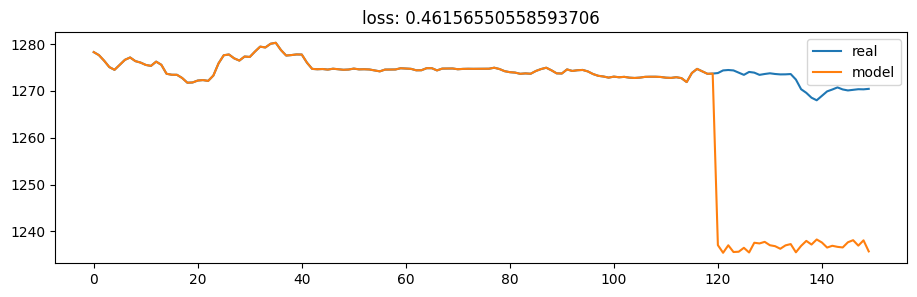

 14%|█▍        | 24/167 [00:04<00:28,  4.95it/s]

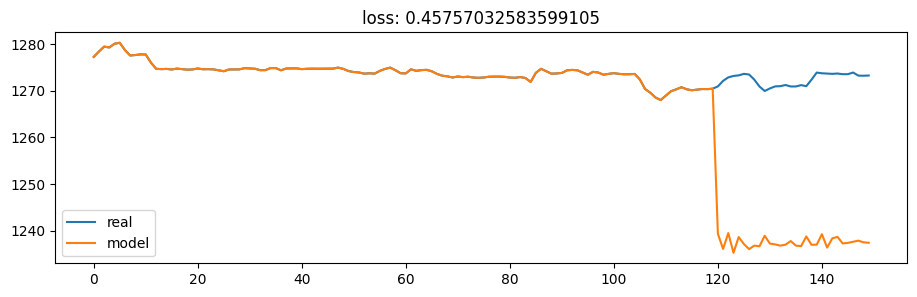

 15%|█▍        | 25/167 [00:04<00:27,  5.10it/s]

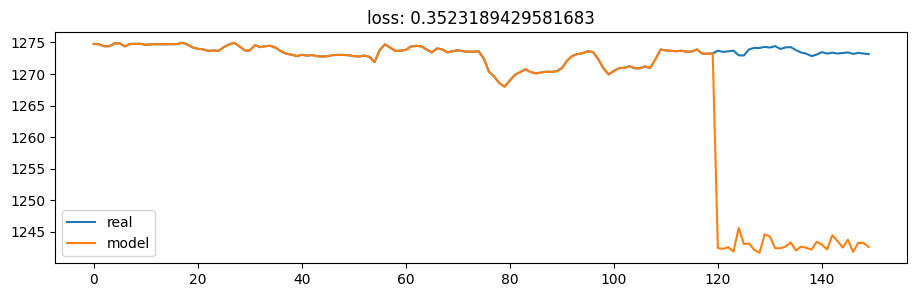

 16%|█▌        | 26/167 [00:04<00:26,  5.26it/s]

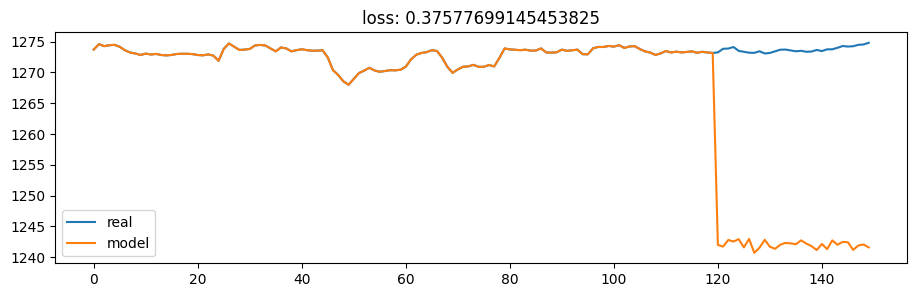

 16%|█▌        | 27/167 [00:04<00:25,  5.44it/s]

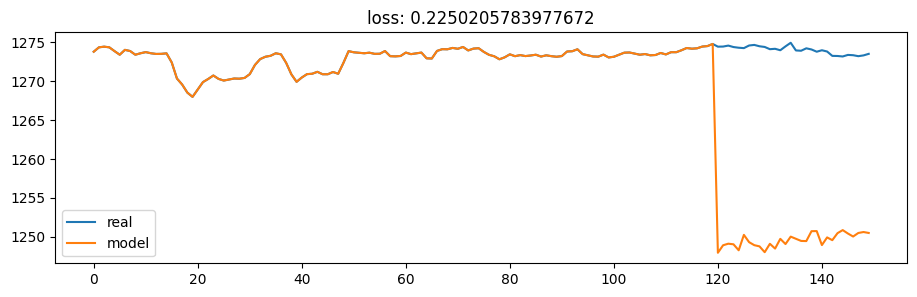

 17%|█▋        | 28/167 [00:05<00:27,  5.12it/s]

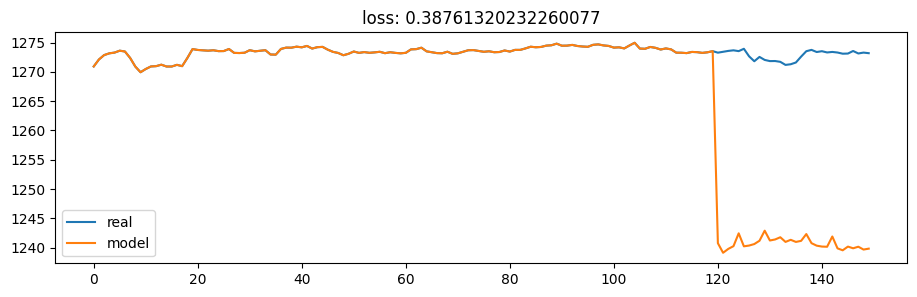

 17%|█▋        | 29/167 [00:05<00:29,  4.75it/s]

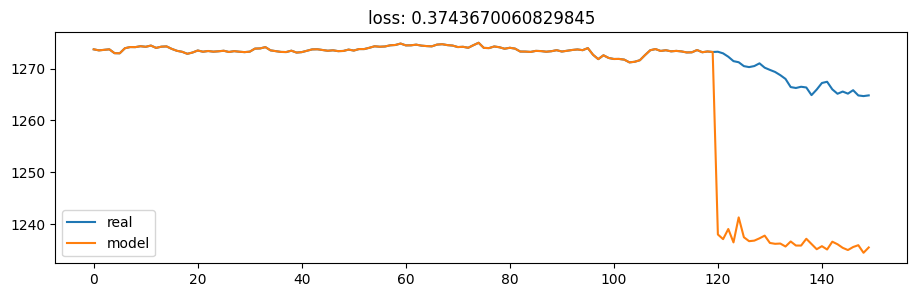

 18%|█▊        | 30/167 [00:05<00:28,  4.77it/s]

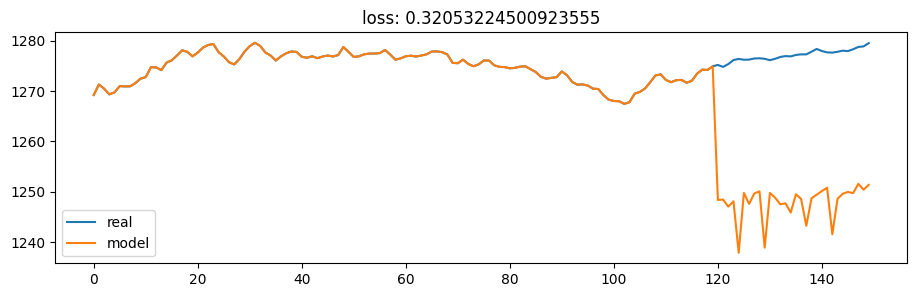

 19%|█▊        | 31/167 [00:05<00:27,  5.02it/s]

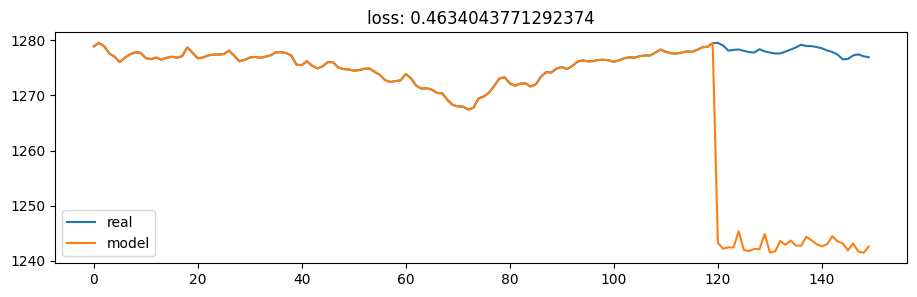

 19%|█▉        | 32/167 [00:05<00:27,  4.98it/s]

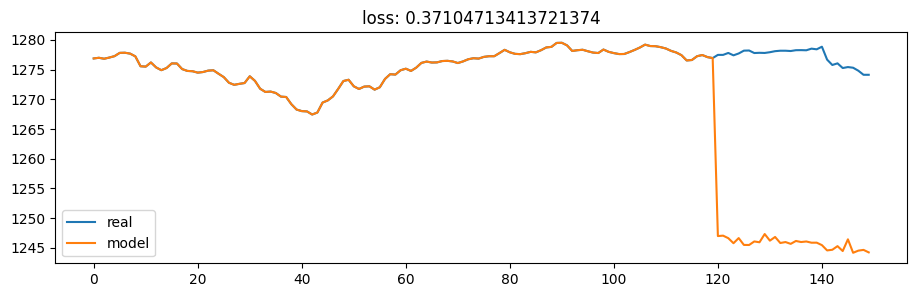

 20%|█▉        | 33/167 [00:06<00:28,  4.76it/s]

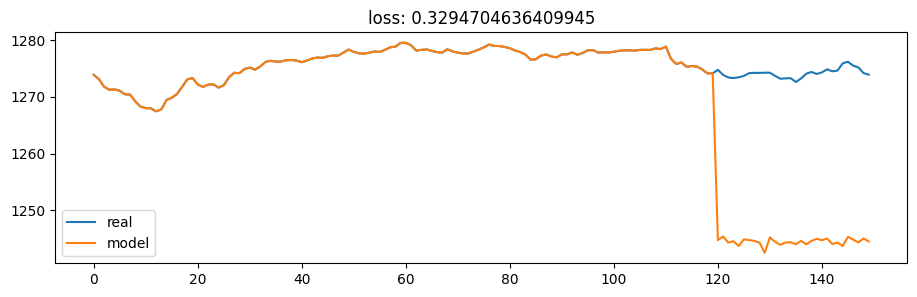

 20%|██        | 34/167 [00:06<00:26,  5.05it/s]

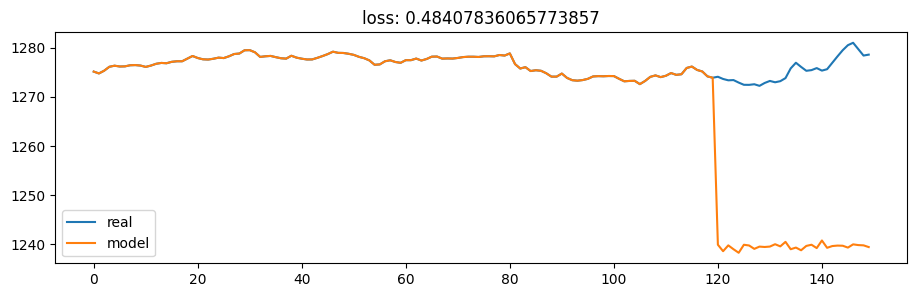

 21%|██        | 35/167 [00:06<00:25,  5.27it/s]

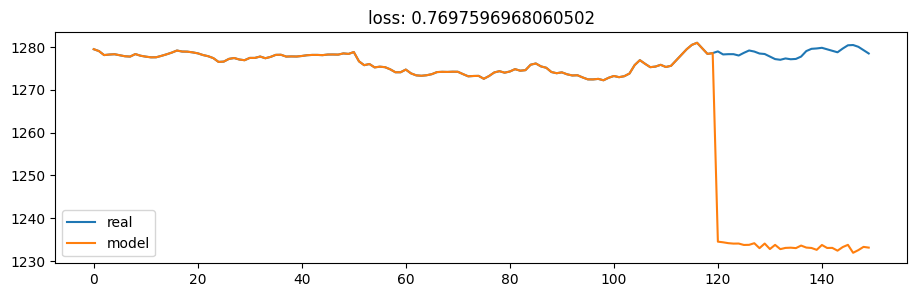

 22%|██▏       | 36/167 [00:06<00:26,  4.95it/s]

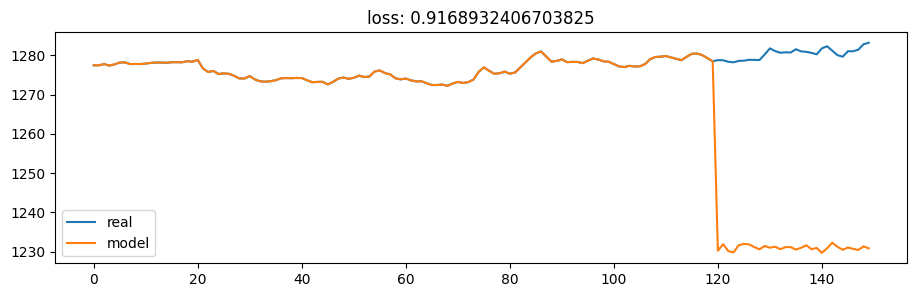

 22%|██▏       | 37/167 [00:06<00:27,  4.69it/s]

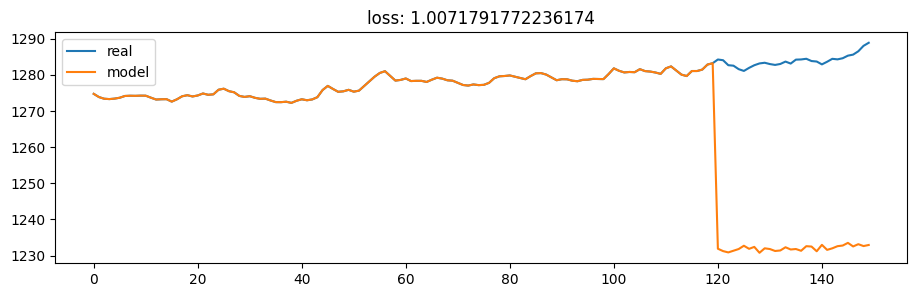

 23%|██▎       | 38/167 [00:07<00:25,  4.97it/s]

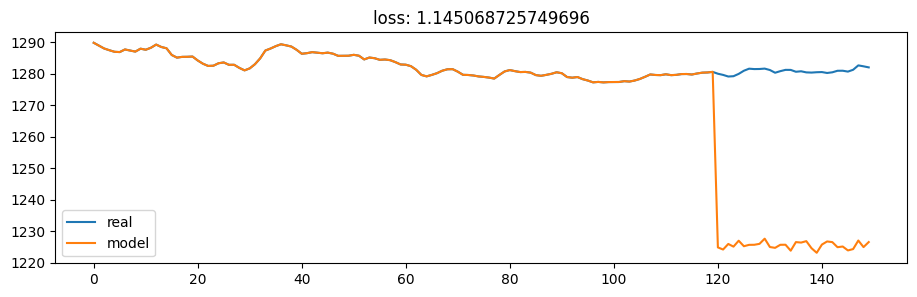

 23%|██▎       | 39/167 [00:07<00:24,  5.12it/s]

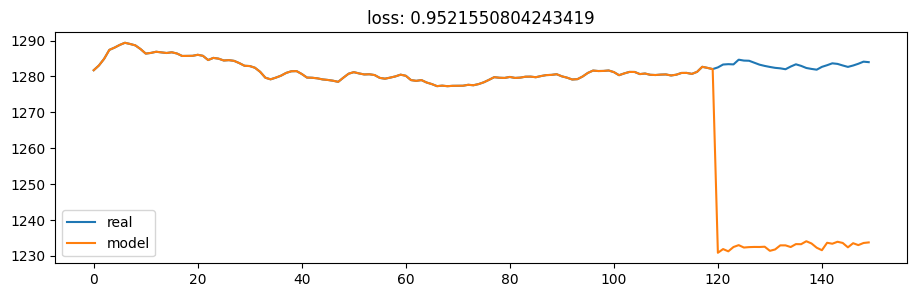

 24%|██▍       | 40/167 [00:07<00:25,  5.01it/s]

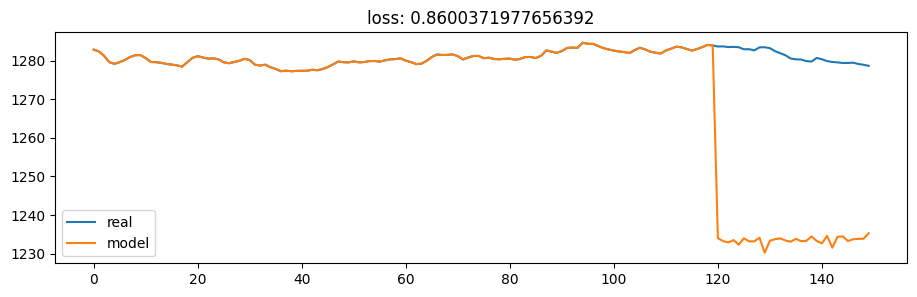

 25%|██▍       | 41/167 [00:07<00:24,  5.09it/s]

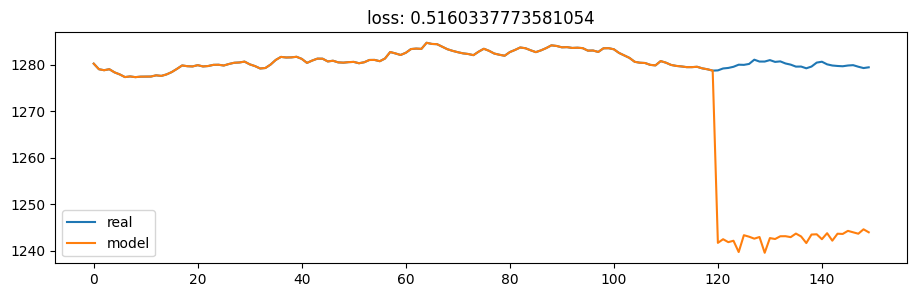

 25%|██▌       | 42/167 [00:07<00:23,  5.36it/s]

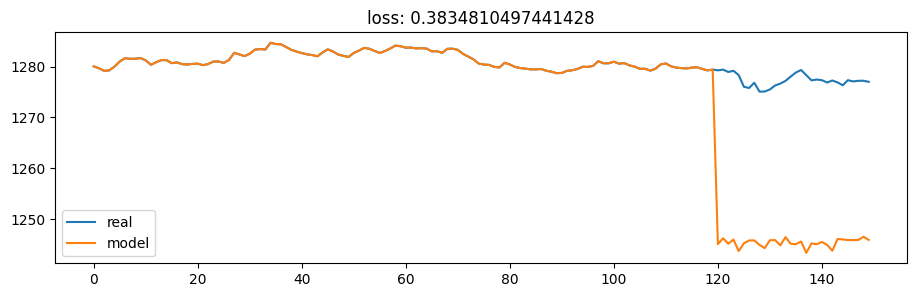

 26%|██▌       | 43/167 [00:08<00:21,  5.67it/s]

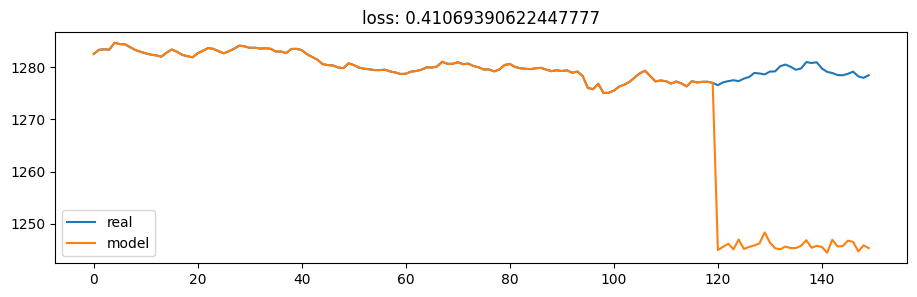

 26%|██▋       | 44/167 [00:08<00:22,  5.39it/s]

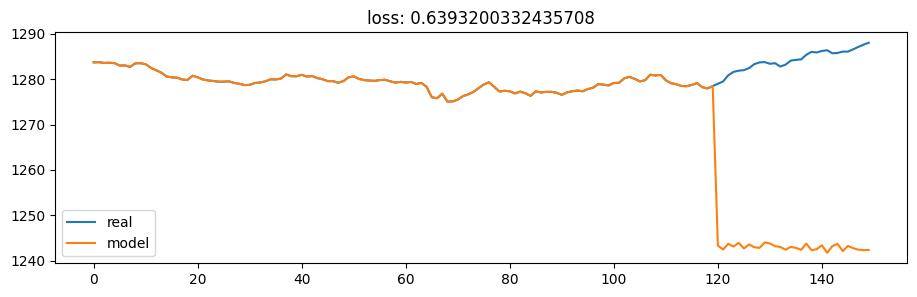

 27%|██▋       | 45/167 [00:08<00:22,  5.39it/s]

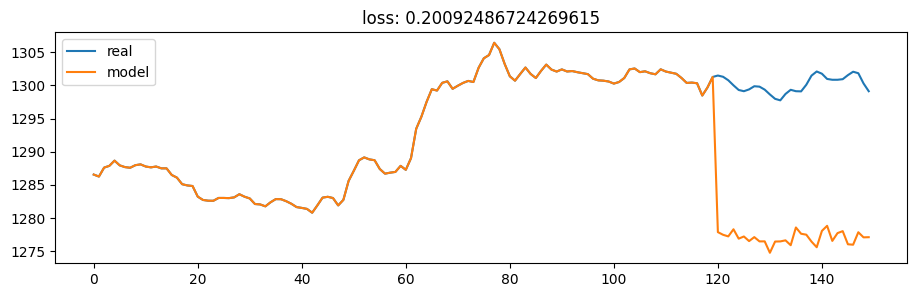

 28%|██▊       | 46/167 [00:08<00:21,  5.50it/s]

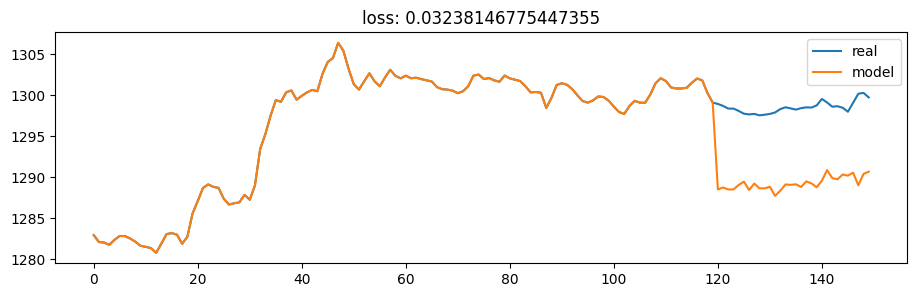

 28%|██▊       | 47/167 [00:08<00:21,  5.58it/s]

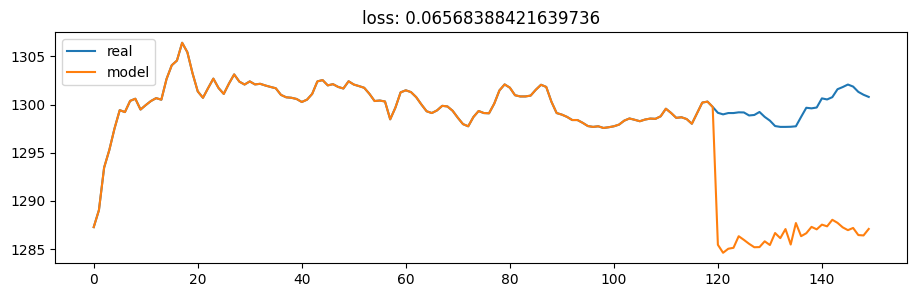

 29%|██▊       | 48/167 [00:09<00:25,  4.69it/s]

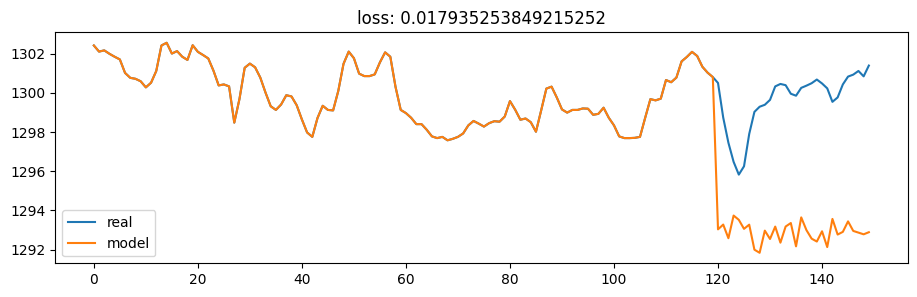

 29%|██▉       | 49/167 [00:09<00:24,  4.76it/s]

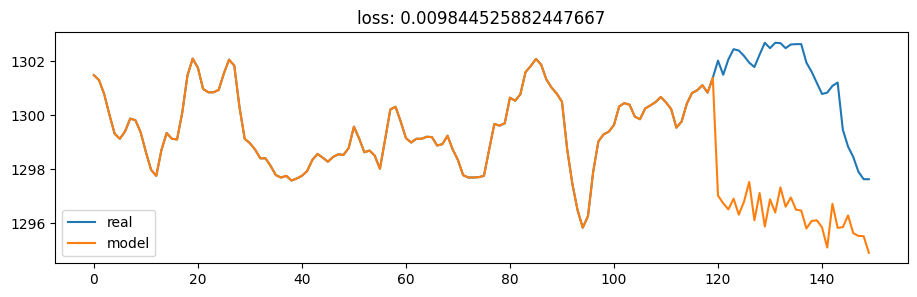

 30%|██▉       | 50/167 [00:09<00:22,  5.18it/s]

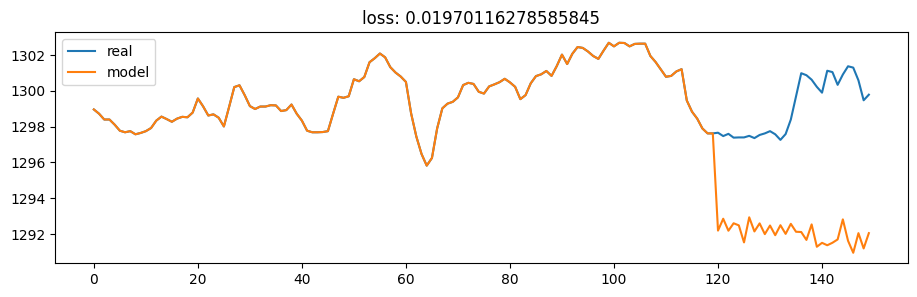

 31%|███       | 51/167 [00:09<00:22,  5.11it/s]

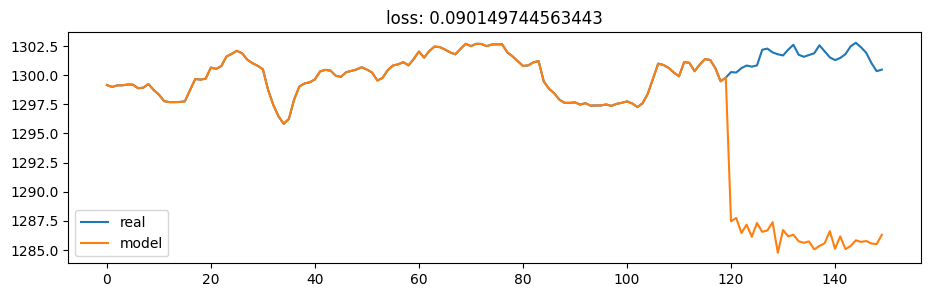

 31%|███       | 52/167 [00:09<00:23,  4.87it/s]

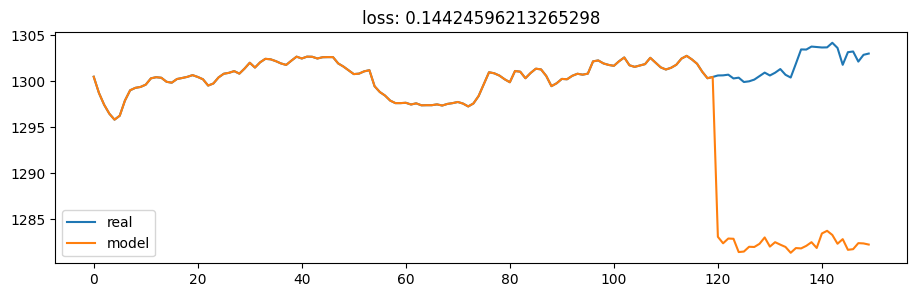

 32%|███▏      | 53/167 [00:10<00:22,  5.12it/s]

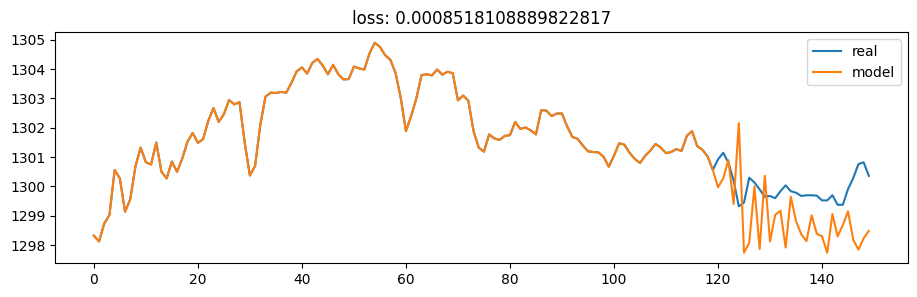

 32%|███▏      | 54/167 [00:10<00:23,  4.87it/s]

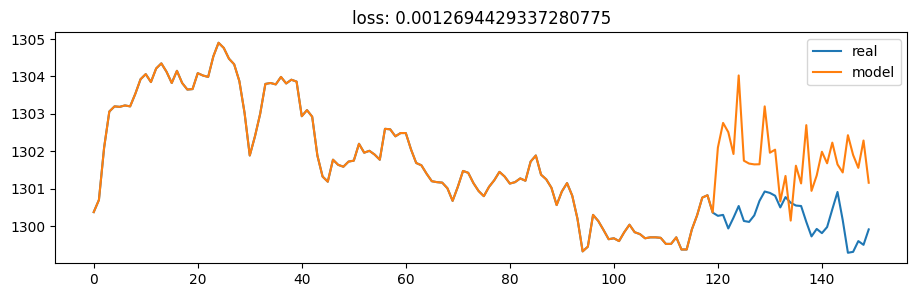

 33%|███▎      | 55/167 [00:10<00:24,  4.56it/s]

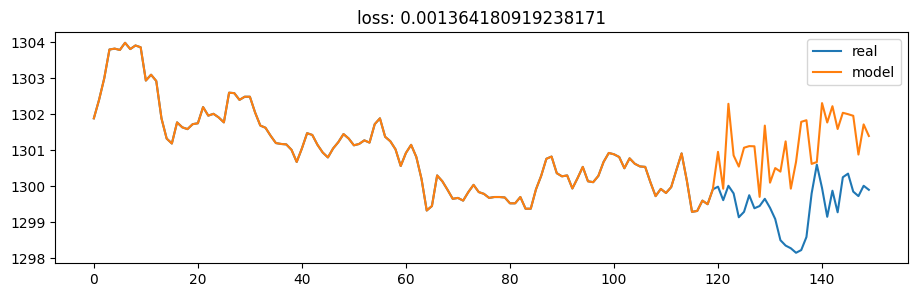

 34%|███▎      | 56/167 [00:10<00:23,  4.73it/s]

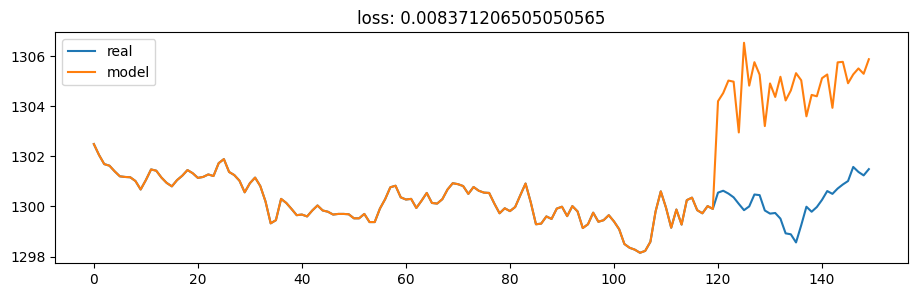

 34%|███▍      | 57/167 [00:10<00:22,  4.80it/s]

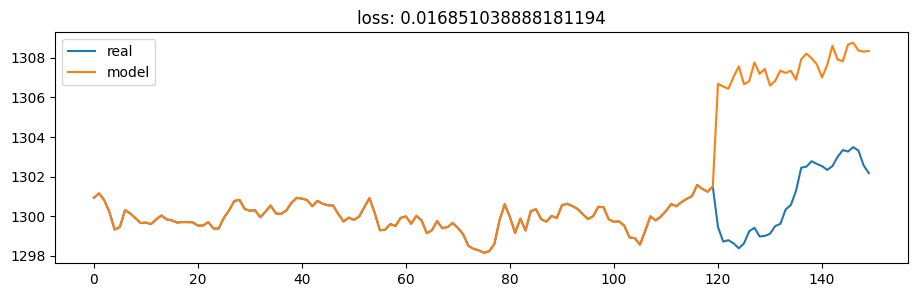

 35%|███▍      | 58/167 [00:11<00:21,  5.05it/s]

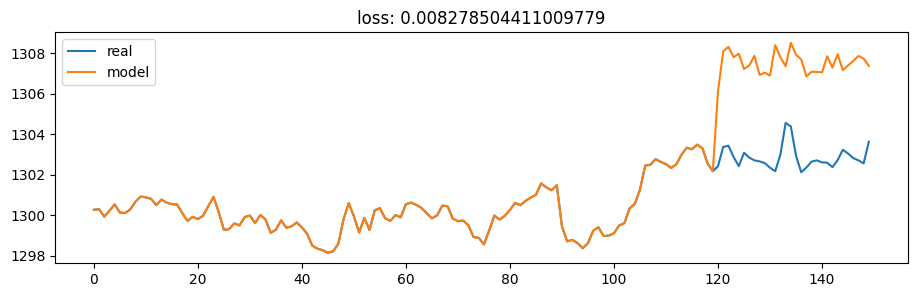

 35%|███▌      | 59/167 [00:11<00:19,  5.44it/s]

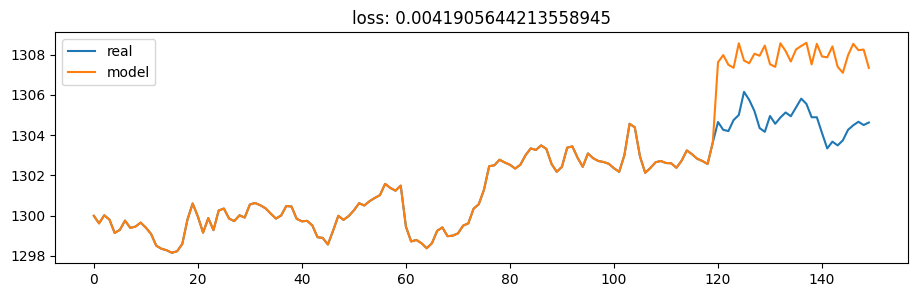

 36%|███▌      | 60/167 [00:11<00:21,  5.08it/s]

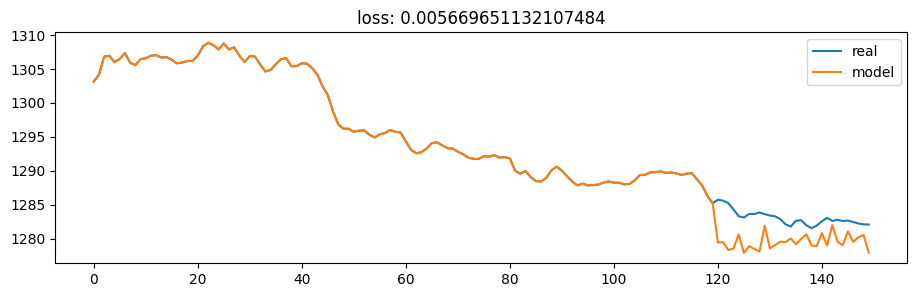

 37%|███▋      | 61/167 [00:11<00:26,  3.97it/s]

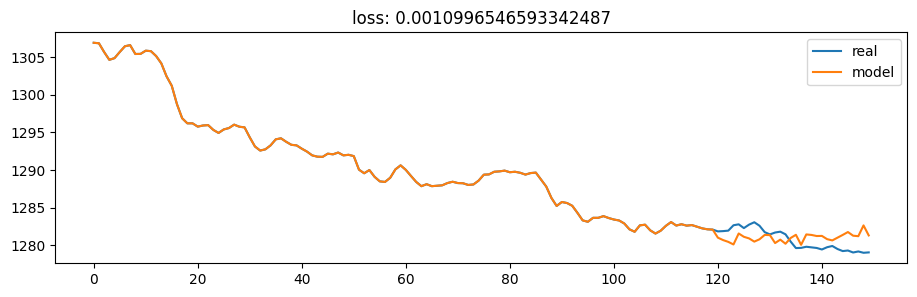

 37%|███▋      | 62/167 [00:12<00:20,  5.09it/s]


KeyboardInterrupt: 

In [76]:
vis = Visualize(args, mode='train', setting=setting, weights=sorted_weights[-1], title_meta=1, decision_log=0)
loss_list, preds, trues = [], [], []
for ts in tqdm(range(0, 5000, 30)):
    pred, true, loss = vis.plot(ts, plot=1, plt_len=None)
    preds.append(pred)
    trues.append(true)
    loss_list.append(loss)

## Visualize pertervations

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl120_pl30_ds_03_23_tg_0_ch_3_test/checkpoint_0.0033.pth
Original data shape: (14250, 4)
Data shape after inter-day:  8550
val 826


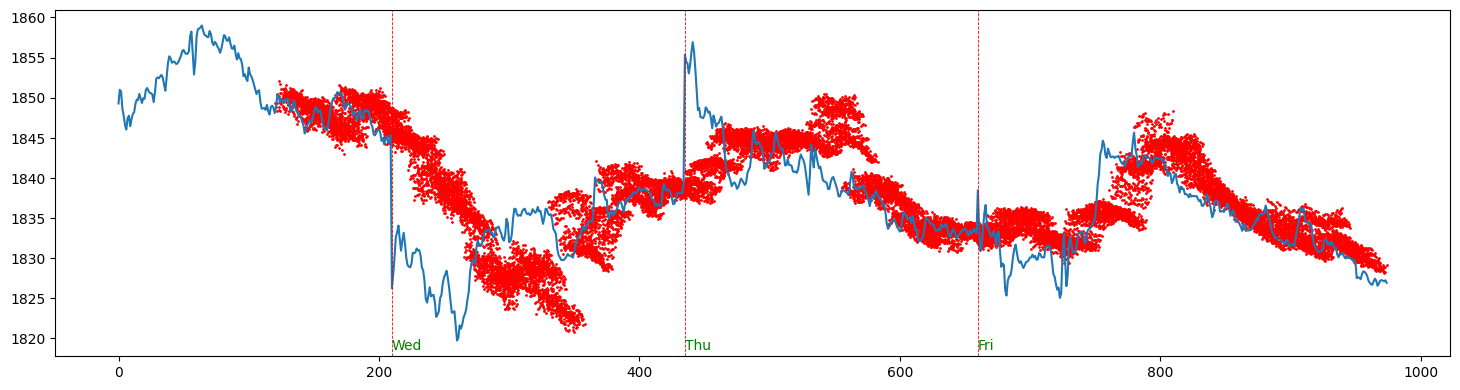

In [37]:
scatter = Scatter(args, setting, sorted_weights[-1], mode='val')
scatter.plot(segment=[0, 1000]) ; plt.show()

In [218]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 0,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[-1])))
attn_weights = model.Attention.weight.cpu().detach().numpy().copy()
sorted_weights[-1]

'checkpoint_0.0043.pth'

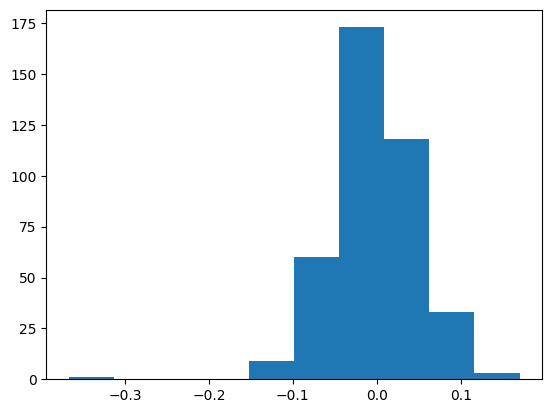

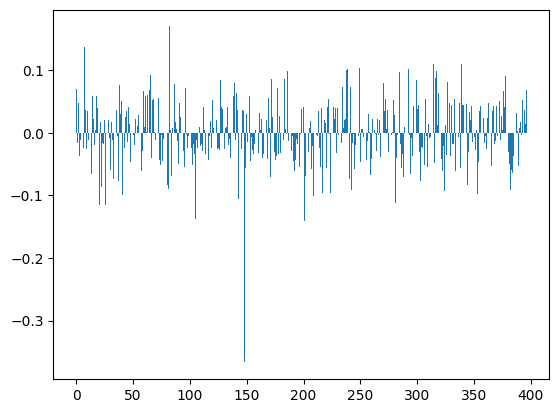

In [221]:
plt.hist(attn_weights[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights[0]) ; plt.show()

In [162]:
stocks = [i for i in range(len(attn_weights[0])) if abs(attn_weights[0][i])>0.3]
sorted(stocks)

[148]

In [233]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights_test[0])).argsort()[::-1]
a[:10]

array([138, 149, 159,  12, 357, 297, 152, 195,  98, 177])

In [234]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights[0])).argsort()[::-1]
a[:10]

array([148,  82, 201, 105,   7, 203,  20,  26, 281, 314])

In [169]:
stocks = [i for i in range(len(attn_weights_test[0])) if abs(attn_weights_test[0][i])>0.15]
sorted(stocks)

[74, 206, 270]

In [208]:
attn_weights_test[0][:5], attn_weights[0][:5]

(array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32),
 array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32))

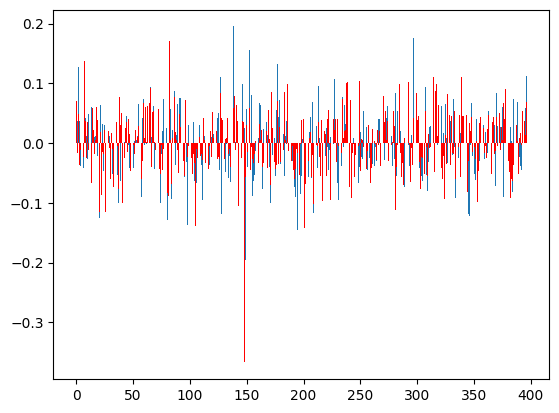

'checkpoint_0.2812.pth'

In [222]:
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[0])))
attn_weights_test = model.Attention.weight.cpu().detach().numpy()
# plt.hist(attn_weights_test[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights_test[0]) ;plt.bar(np.arange(397), attn_weights[0], color='red') ; plt.show()
sorted_weights[-3]

In [53]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 7,
   'patience': 5,
   'target': 0,
   'stocks': [6, 138, 346, 48, 214, 22, 58]
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)


print("\n-------------Training for target {}-------------\n".format(args.target))
exp = ExpMain(args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}_test'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
exp.train(setting)


-------------Training for target 0-------------

Use CPU
Total number of parameters is: 3638
Original data shape: (14250, 8)
Data shape after inter-day:  8550
train 5836
Original data shape: (14250, 8)
Data shape after inter-day:  8550
val 826


100%|██████████| 364/364 [01:01<00:00,  5.91it/s]


Epoch: 1 | time: 61.646013021469116


100%|██████████| 51/51 [00:59<00:00,  1.17s/it]


Epoch: 1, Steps: 364 | Train Loss: 0.0771371 Vali Loss: 0.0225609
Validation loss decreased (inf --> 0.022561).  Saving model ...
Updating learning rate to 0.05


100%|██████████| 364/364 [01:00<00:00,  6.06it/s]


Epoch: 2 | time: 60.03333497047424


100%|██████████| 51/51 [01:00<00:00,  1.19s/it]


Epoch: 2, Steps: 364 | Train Loss: 0.0254359 Vali Loss: 0.0064142
Validation loss decreased (0.022561 --> 0.006414).  Saving model ...
Updating learning rate to 0.025


100%|██████████| 364/364 [01:00<00:00,  6.00it/s]


Epoch: 3 | time: 60.62387299537659


100%|██████████| 51/51 [01:00<00:00,  1.18s/it]


Epoch: 3, Steps: 364 | Train Loss: 0.0151562 Vali Loss: 0.0071138
EarlyStopping counter: 1 out of 5
Updating learning rate to 0.0125


100%|██████████| 364/364 [01:00<00:00,  6.00it/s]


Epoch: 4 | time: 60.67474102973938


100%|██████████| 51/51 [01:00<00:00,  1.19s/it]


Epoch: 4, Steps: 364 | Train Loss: 0.0088588 Vali Loss: 0.0078301
EarlyStopping counter: 2 out of 5
Updating learning rate to 0.00625


100%|██████████| 364/364 [01:00<00:00,  5.99it/s]


Epoch: 5 | time: 60.79723501205444


100%|██████████| 51/51 [01:00<00:00,  1.19s/it]


Epoch: 5, Steps: 364 | Train Loss: 0.0077957 Vali Loss: 0.0063550
Validation loss decreased (0.006414 --> 0.006355).  Saving model ...
Updating learning rate to 0.003125


100%|██████████| 364/364 [01:00<00:00,  6.00it/s]


Epoch: 6 | time: 60.644813776016235


100%|██████████| 51/51 [01:00<00:00,  1.18s/it]


Epoch: 6, Steps: 364 | Train Loss: 0.0071314 Vali Loss: 0.0055203
Validation loss decreased (0.006355 --> 0.005520).  Saving model ...
Updating learning rate to 0.0015625


100%|██████████| 364/364 [01:00<00:00,  5.98it/s]


Epoch: 7 | time: 60.86222505569458


100%|██████████| 51/51 [01:00<00:00,  1.18s/it]


Epoch: 7, Steps: 364 | Train Loss: 0.0068811 Vali Loss: 0.0058005
EarlyStopping counter: 1 out of 5
Updating learning rate to 0.00078125


100%|██████████| 364/364 [00:16<00:00, 22.29it/s]


KeyboardInterrupt: 

In [71]:
from models.nlinear_attention import Model

args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 0,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)

model = Model(args)


In [10]:
stock_heatmap_matrix = get_stock_heatmap_matrix(model, 99, args)
stock_heatmap_matrix_2 = get_stock_heatmap_matrix(model, 99, args, setting_suffix='_2')

In [11]:
a = get_stock_meta("{}/instruments.json".format(ltsf), "{}/03_23.csv".format(ltsf))
names = []
for k, v in a.items():
    names.append(v['name'])

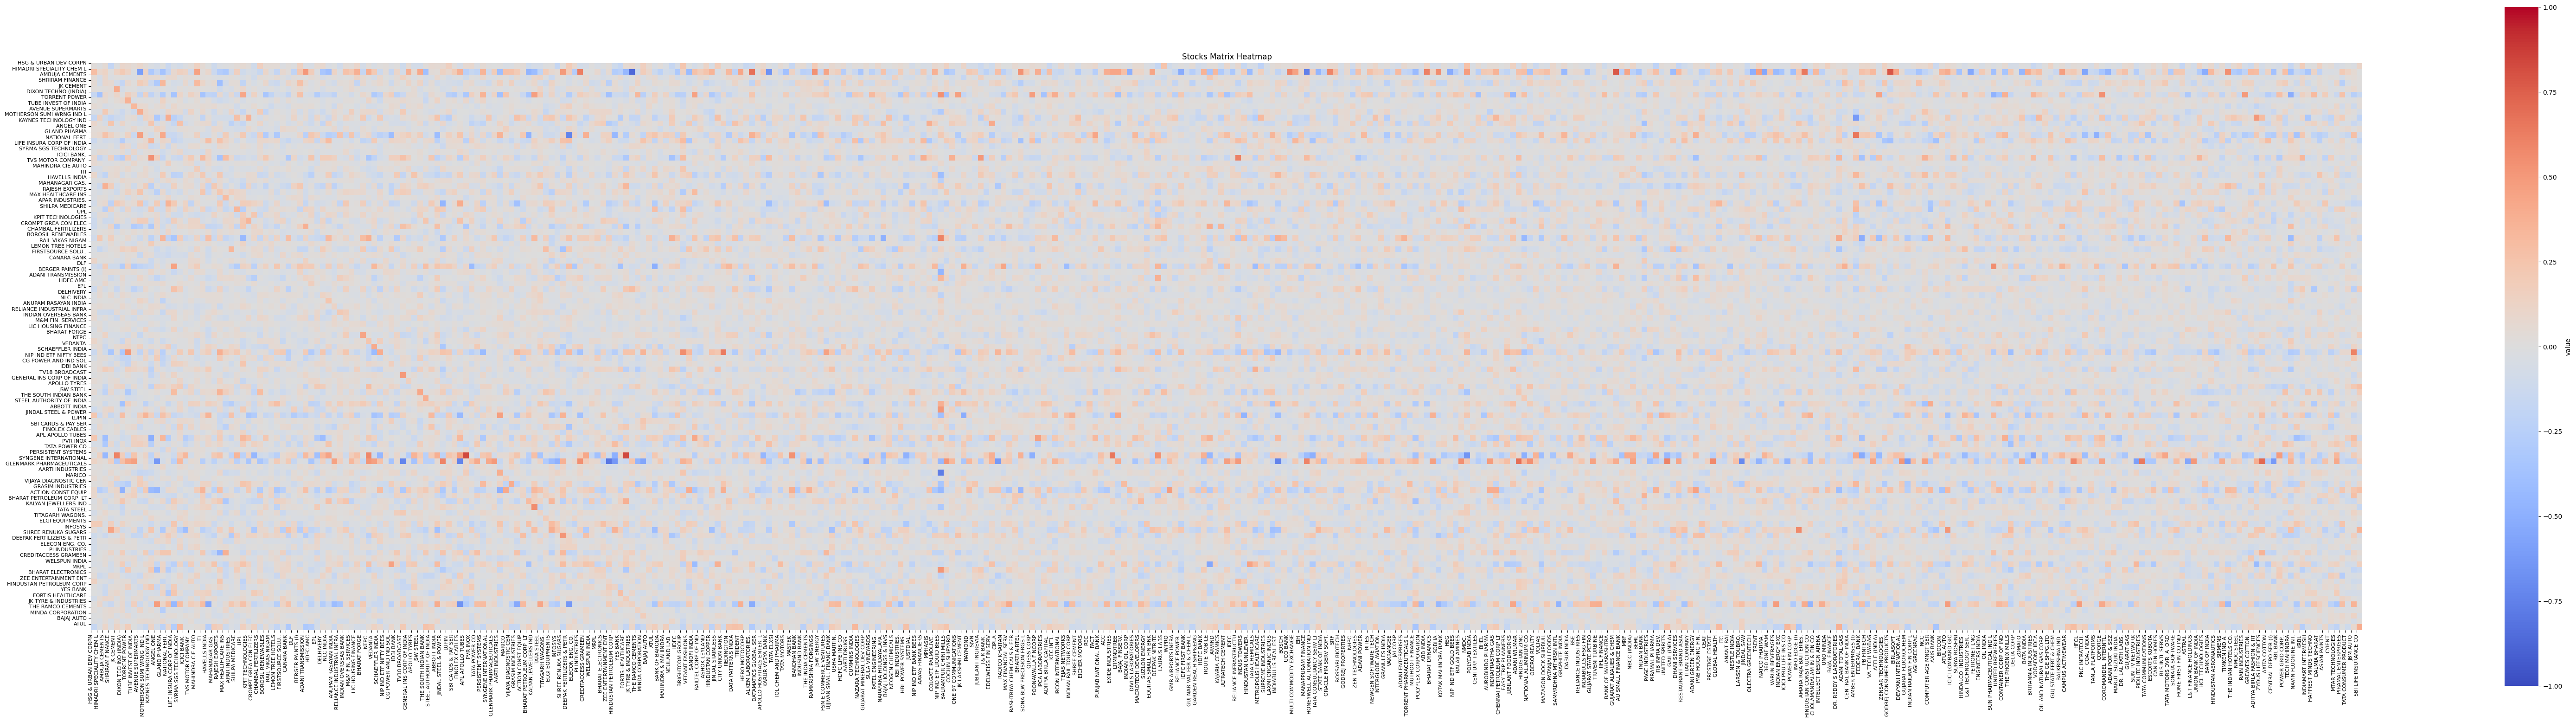

In [12]:
craete_heatmap(stock_heatmap_matrix, names)

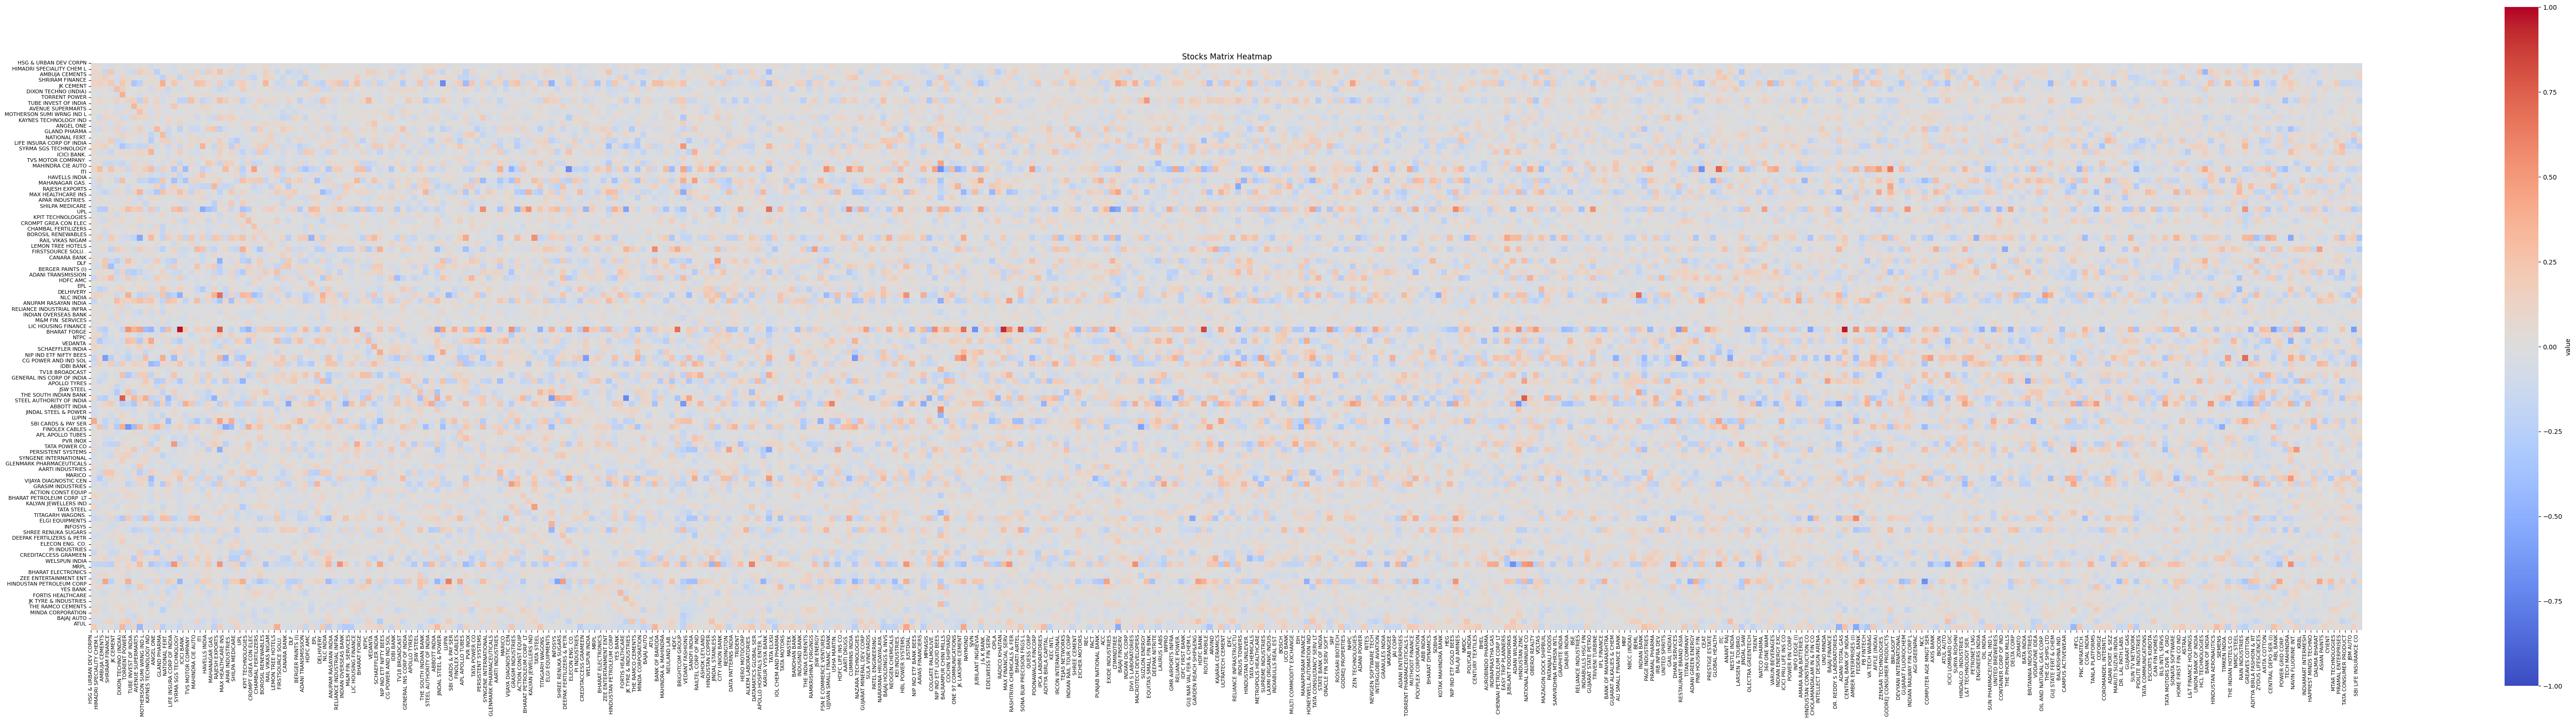

In [13]:
craete_heatmap(stock_heatmap_matrix_2, names)

In [14]:
# args sort each stock in axis0 by taking abs first
a = np.argsort(abs(stock_heatmap_matrix), axis=1)[:, ::-1]
b = np.argsort(abs(stock_heatmap_matrix_2), axis=1)[:, ::-1]
a.shape, b.shape

((99, 397), (99, 397))

In [51]:
k = 15
common_stock_map = {}
for i in range(99):
    common = set(a[i][:k]).intersection(set(b[i][:k]))
    common_stock_map[i] = common

In [52]:
l = []
# sort the common_stock_map by length of common stocks
sorted_map = sorted(common_stock_map.items(), key=lambda x: len(x[1]), reverse=True)
for i in sorted_map:
    l.append(len(i[1]))
    print(i[0], names[i[0]], len(i[1]), i[1])

6 TORRENT POWER 6 {138, 346, 48, 214, 22, 58}
4 JK CEMENT 5 {4, 314, 142, 308, 26}
38 HDFC AMC 5 {321, 38, 80, 179, 152}
53 IDBI BANK 4 {384, 313, 308, 101}
64 FINOLEX CABLES 4 {64, 49, 308, 22}
93 FORTIS HEALTHCARE 4 {338, 50, 93, 238}
0 HSG & URBAN DEV CORPN 3 {365, 83, 109}
27 KPIT TECHNOLOGIES 3 {64, 27, 205}
33 FIRSTSOURCE SOLU.. 3 {26, 196, 271}
43 RELIANCE INDUSTRIAL INFRA 3 {148, 12, 239}
44 INDIAN OVERSEAS BANK 3 {44, 198, 103}
47 BHARAT FORGE 3 {314, 348, 118}
48 NTPC 3 {384, 48, 324}
73 VIJAYA DIAGNOSTIC CEN 3 {73, 230, 327}
77 KALYAN JEWELLERS IND 3 {283, 171, 77}
92 YES BANK 3 {28, 13, 92}
95 THE RAMCO CEMENTS 3 {314, 12, 118}
98 ATUL 3 {305, 346, 142}
8 AVENUE SUPERMARTS 2 {8, 54}
10 KAYNES TECHNOLOGY IND 2 {138, 15}
11 ANGEL ONE 2 {11, 142}
13 NATIONAL FERT. 2 {104, 10}
14 LIFE INSURA CORP OF INDIA 2 {5, 103}
18 MAHINDRA CIE AUTO 2 {314, 83}
21 MAHANAGAR GAS. 2 {314, 277}
22 RAJESH EXPORTS 2 {8, 103}
23 MAX HEALTHCARE INS 2 {355, 95}
26 UPL 2 {186, 26}
28 CROMPT GREA CON